In [1]:
import pandas as pd

## Reading Population Data

In [2]:
mlb = pd.read_csv('mlb.csv')
mlb.head()

,name,team,position,height,weight,age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [4]:
mlb.shape

(1034, 6)

## Summary Stats

In [9]:
mlb.describe().T

,count,mean,std,min,25%,50%,75%,max
height,1034.0,73.697292,2.305818,67.0,72.00,74.000,75.0000,83.00
weight,1033.0,201.689255,20.991491,150.0,187.00,200.000,215.0000,290.00
age,1034.0,28.736712,4.320310,20.9,25.44,27.925,31.2325,48.52


In [10]:
import matplotlib.pyplot as plt

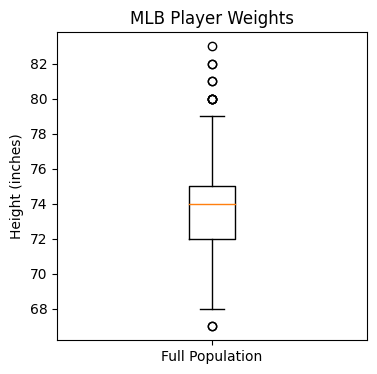

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
ax.boxplot(mlb['height'])
ax.set_ylabel("Height (inches)")
plt.title("MLB Player Weights")

# change the X ticks to say 'Full Population' 
# not sure this was needed
plt.xticks([1], ['Full Population'])
plt.show()

## Random Samples

In [17]:
sample1=mlb.sample(n=30, random_state=8675309)
sample2=mlb.sample(n=30, random_state=1729)
sample3 = [71,72,73,74,74,
           76,75,75,75,76,
           75,77,76,75,77,
           76,75,76,76,75,
           75,81,77,75,77,
           75,77,77,75,75]

In [18]:
import numpy as np

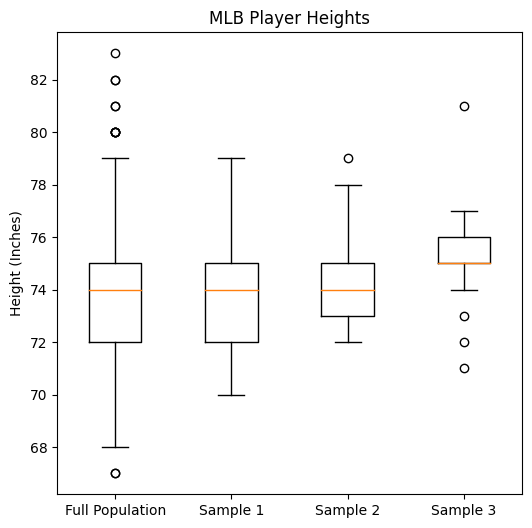

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot([mlb['height'], sample1['height'], sample2['height'], np.array(sample3)])
ax.set_ylabel('Height (Inches)')
plt.title("MLB Player Heights")

# This adds labels to the 4 ticks
plt.xticks([1,2,3,4], ['Full Population','Sample 1', 'Sample 2', 'Sample 3'])
plt.show()

In [22]:
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))

73.8
74.36666666666666
75.43333333333334


## Differences Between Sample Data

In [24]:
alldifferences = []
for i in range(1000):
    newsample1=mlb.sample(n=30, random_state=i*2)
    newsample2=mlb.sample(n=30, random_state=i*2+1)
    alldifferences.append(newsample1['height'].mean()-newsample2['height'].mean())
print(alldifferences[:10])

[0.8333333333333286, -0.30000000000001137, -0.10000000000000853, -0.1666666666666572, 0.06666666666667709, -0.9666666666666686, 0.7999999999999972, 0.9333333333333371, -0.5333333333333314, -0.20000000000000284]


In [25]:
import seaborn as sns

C:\Users\timry\AppData\Local\Temp\ipykernel_17304\3323752581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax =sns.distplot(alldifferences).set_title("Differences Between SAmple Means")


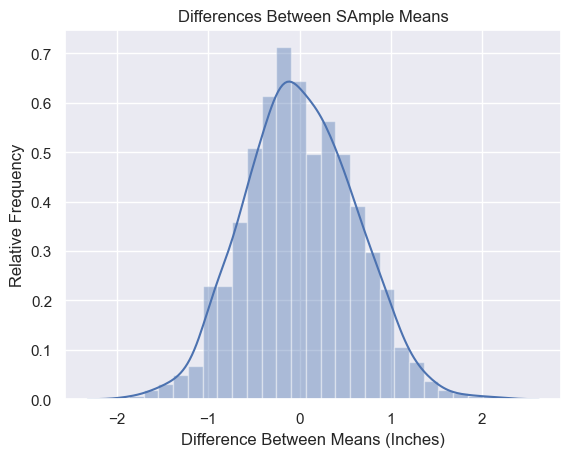

In [27]:
sns.set()
ax =sns.distplot(alldifferences).set_title("Differences Between SAmple Means")
plt.xlabel("Difference Between Means (Inches)")
plt.ylabel("Relative Frequency")
plt.show()

In [28]:
# Check exactly how many of the differences have magnitude >= 1.6 inches
# this "8" translates into a p-value of 0.8 percent
largedifferences=[diff for diff in alldifferences if abs(diff)>=1.6]
print(len(largedifferences))

8


In [29]:
# this "163" translates into a p-values of 16.3 percent
smalldifferences=[diff for diff in alldifferences if abs(diff>=0.6)]
print(len(smalldifferences))

163


## The t-test

In [34]:
from scipy.stats import ttest_ind, mannwhitneyu

In [35]:
ttest_ind(sample1['height'],sample2['height'])

TtestResult(statistic=-1.0839563860213952, pvalue=0.2828695892305152, df=58.0)

## Mann - Whitney U test

In [36]:
mannwhitneyu(sample1['height'], sample2['height'])

MannwhitneyuResult(statistic=392.0, pvalue=0.38913738408151577)

## Comparing Groups in a Practical Context

In [37]:
desktop = pd.read_csv('desktop.csv')
laptop = pd.read_csv('laptop.csv')

In [38]:
desktop.head(3)

,userid,spending,age,visits
0,1,1250,31,126
1,2,900,27,5
2,3,0,30,459


In [39]:
laptop.head(3)

,userid,spending,age,visits
0,31,1499,32,12
1,32,799,23,40
2,33,1200,45,22


In [40]:
import matplotlib.pyplot as plt

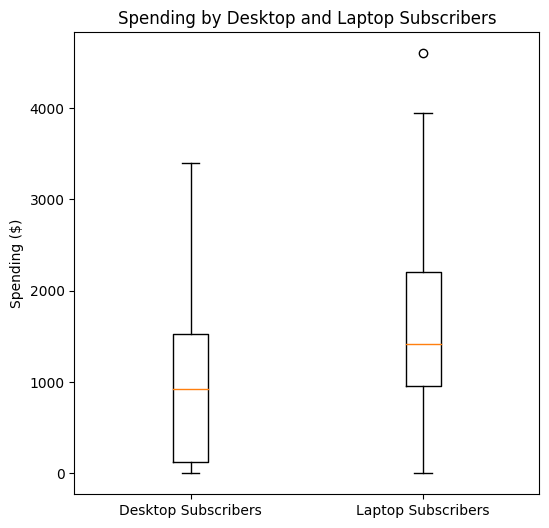

In [43]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Spending by Desktop and Laptop Subscribers")
ax.boxplot([desktop['spending'].values, laptop['spending'].values])
ax.set_ylabel('Spending ($)')
plt.xticks([1,2],['Desktop Subscribers','Laptop Subscribers'])
plt.show()

In [44]:
desktop.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,30.0,15.500000,8.803408,1.0,8.25,15.5,22.75,30.0
spending,30.0,1028.666667,907.411032,0.0,127.50,925.0,1528.25,3400.0
age,30.0,35.766667,15.199100,14.0,25.50,32.0,44.25,79.0
visits,30.0,210.800000,311.468203,5.0,46.75,100.0,145.00,1256.0


In [45]:
laptop.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,30.0,45.500000,8.803408,31.0,38.25,45.5,52.75,60.0
spending,30.0,1624.566667,1252.884222,0.0,957.50,1419.5,2199.75,4600.0
age,30.0,38.733333,17.104009,16.0,25.00,33.0,49.75,79.0
visits,30.0,193.900000,323.071611,6.0,39.25,77.5,126.00,1250.0


In [46]:
ttest_ind(desktop['spending'],laptop['spending'])

TtestResult(statistic=-2.109853741030508, pvalue=0.03919630411621095, df=58.0)